In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import palmerpenguins
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

D:\Proyectos\ML\envprueba\Lib\site-packages\palmerpenguins\penguins.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
D:\Proyectos\ML\envprueba\Lib\site-packages\pkg_resources\__init__.py:2832: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('zope')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)


In [2]:
df = pd.read_csv('articles.csv') # preprocessed Data
df.head()

,key,title,year,month,day,journal,issn,volume,issue,pages,...,url,language,publisher,location,abstract,notes,doi,keywords,pubmed_id,pmc_id
0,rayyan-4717607,An Efficient Unsupervised Approach for OCR Err...,2023,NaN,NaN,IEEE Access,2169-3536 VO - 11,11,NaN,58406-58421,...,NaN,NaN,NaN,NaN,Different types of OCR errors often occur in O...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2023.3283340,Optical character recognition;Error correction...,NaN,NaN
1,rayyan-4717608,MMU-OCR-21: Towards End-to-End Urdu Text Recog...,2021,NaN,NaN,IEEE Access,2169-3536 VO - 9,9,NaN,124945-124962,...,NaN,NaN,NaN,NaN,Optical Character Recognition (OCR) is a techn...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2021.3110787,Optical character recognition software;Deep le...,NaN,NaN
2,rayyan-4717609,ADOCRNet: A Deep Learning OCR for Arabic Docum...,2024,NaN,NaN,IEEE Access,2169-3536 VO - 12,12,NaN,55620-55631,...,NaN,NaN,NaN,NaN,"In recent years, Optical character recognition...","RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2024.3379530,Convolutional neural networks;Optical characte...,NaN,NaN
3,rayyan-4717610,An Enhanced Offline Printed Arabic OCR Model B...,2020,NaN,NaN,IEEE Access,2169-3536 VO - 8,8,NaN,117770-117781,...,NaN,NaN,NaN,NaN,"In the recent few years, there was a concentra...","RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.3004286,Optical character recognition software;Feature...,NaN,NaN
4,rayyan-4717611,Handwritten Optical Character Recognition (OCR...,2020,NaN,NaN,IEEE Access,2169-3536 VO - 8,8,NaN,142642-142668,...,NaN,NaN,NaN,NaN,Given the ubiquity of handwritten documents in...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.3012542,Optical character recognition software;Charact...,NaN,NaN


In [3]:
df.shape

(27, 21)

In [6]:
df.drop(columns=['month','day', 'issue','url','language','publisher','location'], inplace=True)

In [8]:
df.drop(columns=['pubmed_id','pmc_id'], inplace=True)

In [9]:
df

,key,title,year,journal,issn,volume,pages,authors,abstract,notes,doi,keywords
0,rayyan-4717607,An Efficient Unsupervised Approach for OCR Err...,2023,IEEE Access,2169-3536 VO - 11,11,58406-58421,Q. -D. Nguyen and N. -M. Phan and P. Krömer an...,Different types of OCR errors often occur in O...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2023.3283340,Optical character recognition;Error correction...
1,rayyan-4717608,MMU-OCR-21: Towards End-to-End Urdu Text Recog...,2021,IEEE Access,2169-3536 VO - 9,9,124945-124962,T. Nasir and M. K. Malik and K. Shahzad,Optical Character Recognition (OCR) is a techn...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2021.3110787,Optical character recognition software;Deep le...
2,rayyan-4717609,ADOCRNet: A Deep Learning OCR for Arabic Docum...,2024,IEEE Access,2169-3536 VO - 12,12,55620-55631,L. Mosbah and I. Moalla and T. M. Hamdani and ...,"In recent years, Optical character recognition...","RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2024.3379530,Convolutional neural networks;Optical characte...
3,rayyan-4717610,An Enhanced Offline Printed Arabic OCR Model B...,2020,IEEE Access,2169-3536 VO - 8,8,117770-117781,S. M. Darwish and K. O. Elzoghaly,"In the recent few years, there was a concentra...","RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.3004286,Optical character recognition software;Feature...
4,rayyan-4717611,Handwritten Optical Character Recognition (OCR...,2020,IEEE Access,2169-3536 VO - 8,8,142642-142668,J. Memon and M. Sami and R. A. Khan and M. Uddin,Given the ubiquity of handwritten documents in...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.3012542,Optical character recognition software;Charact...
5,rayyan-4717612,Efficient Text Bounding Box Identification Usi...,2024,IEEE Access,2169-3536 VO - 12,12,49306-49328,P. Kiatphaisansophon and D. Wanvarie and N. Co...,Text detection is a fundamental task in comput...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2024.3383911,Text detection;Feature extraction;Optical char...
6,rayyan-4717614,Handwritten Arabic Optical Character Recogniti...,2020,IEEE Access,2169-3536 VO - 8,8,23011-23021,A. T. Sahlol and M. Abd Elaziz and M. A. A. Al...,Accomplishing high recognition performance is ...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.2970438,Feature extraction;Character recognition;Whale...
7,rayyan-4717615,A Neural Network Architecture for Information ...,2020,IEEE Access,2169-3536 VO - 8,8,51256-51264,R. -G. Zhou and S. Chang and Y. Li,There is a lot of useful information in the me...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.2978079,Optical character recognition software;Data mo...
8,rayyan-4717617,Urdu-Text Detection and Recognition in Natural...,2020,IEEE Access,2169-3536 VO - 8,8,96787-96803,S. Y. Arafat and M. J. Iqbal,Urdu text is a cursive script and belongs to a...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.2994214,Text recognition;Image recognition;Character r...
9,rayyan-4717618,CArDIS: A Swedish Historical Handwritten Chara...,2022,IEEE Access,2169-3536 VO - 10,10,55338-55349,A. Yavariabdi and H. Kusetogullari and T. Celi...,This paper introduces a new publicly available...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2022.3175197,Character recognition;Optical character recogn...


In [12]:
# Escribir el contenido BibTeX en un archivo
with open('output.bib', 'w', encoding='utf-8') as bib_file:
    for index, row in df.iterrows():
        bib_entry = "@article{" + str(index) + ",\n"  # Genera la etiqueta de la entrada
        for key, value in row.items():
            if pd.notna(value):  # Verificar si el valor no es NaN
                bib_entry += "    " + key + " = {" + str(value) + "},\n"  # Agregar cada campo con su valor
        bib_entry += "}\n\n"  # Marcar el final de la entrada
        bib_file.write(bib_entry)


<Axes: xlabel='year', ylabel='journal'>

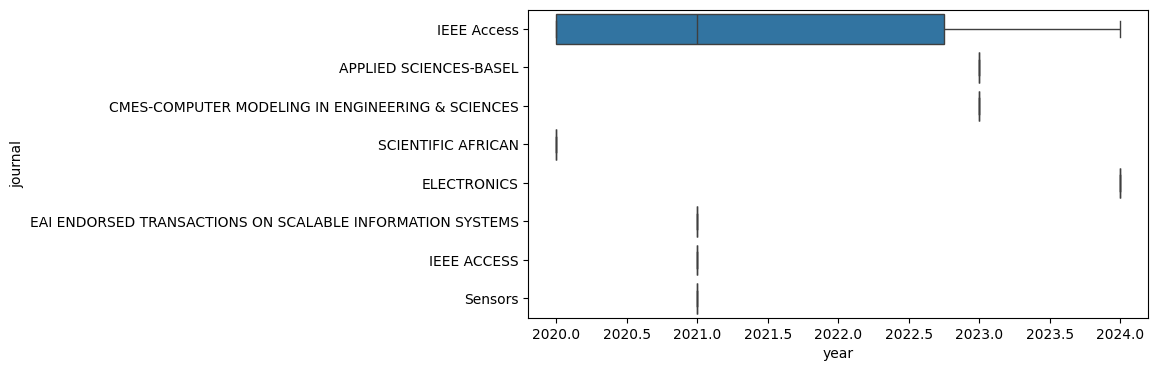

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot (
    data=df,
    x='year',
    y='journal'
)

In [13]:
df.corr(numeric_only=True)

,year,volume
year,1.000000,0.239523
volume,0.239523,1.000000


<Axes: >

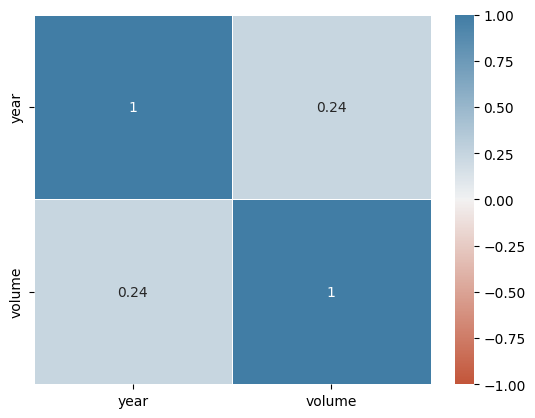

In [14]:
sns.heatmap(
    data=df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=.5,
    annot=True,
)

In [15]:
import requests

def descargar_articulo_por_doi(doi, nombre_archivo):
    # URL base para realizar la solicitud
    base_url = 'https://doi.org/'

    # Combinar el DOI con la URL base
    url = base_url + doi

    try:
        # Realizar la solicitud GET al URL
        response = requests.get(url)
        response.raise_for_status()  # Levantar una excepción si hay un error en la solicitud

        # Guardar el contenido de la respuesta en un archivo
        with open(nombre_archivo, 'wb') as archivo:
            archivo.write(response.content)

        print(f"Artículo descargado exitosamente como '{nombre_archivo}'.")

    except requests.exceptions.RequestException as e:
        print(f"Error al descargar el artículo: {e}")

# Ejemplo de uso de la función
doi = '10.1109/ACCESS.2023.3283340'  # DOI del artículo
nombre_archivo = 'Prueba1.pdf'  # Nombre del archivo de salida
descargar_articulo_por_doi(doi, nombre_archivo)


Error al descargar el artículo: 418 Client Error: Unknown Code for url: https://ieeexplore.ieee.org/document/10144767/


In [17]:
df['doi']

0                           10.1109/ACCESS.2023.3283340
1                           10.1109/ACCESS.2021.3110787
2                           10.1109/ACCESS.2024.3379530
3                           10.1109/ACCESS.2020.3004286
4                           10.1109/ACCESS.2020.3012542
5                           10.1109/ACCESS.2024.3383911
6                           10.1109/ACCESS.2020.2970438
7                           10.1109/ACCESS.2020.2978079
8                           10.1109/ACCESS.2020.2994214
9                           10.1109/ACCESS.2022.3175197
10                          10.1109/ACCESS.2021.3072900
11                          10.1109/ACCESS.2020.3025221
12                          10.1109/ACCESS.2021.3064019
13                          10.1109/ACCESS.2023.3282444
14                          10.1109/ACCESS.2022.3216881
15                          10.1109/ACCESS.2024.3378598
16                          10.1109/ACCESS.2020.3025769
17                          10.1109/ACCESS.2021.

In [19]:
df

,key,title,year,journal,issn,volume,pages,authors,abstract,notes,doi,keywords
0,rayyan-4717607,An Efficient Unsupervised Approach for OCR Err...,2023,IEEE Access,2169-3536 VO - 11,11,58406-58421,Q. -D. Nguyen and N. -M. Phan and P. Krömer an...,Different types of OCR errors often occur in O...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2023.3283340,Optical character recognition;Error correction...
1,rayyan-4717608,MMU-OCR-21: Towards End-to-End Urdu Text Recog...,2021,IEEE Access,2169-3536 VO - 9,9,124945-124962,T. Nasir and M. K. Malik and K. Shahzad,Optical Character Recognition (OCR) is a techn...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2021.3110787,Optical character recognition software;Deep le...
2,rayyan-4717609,ADOCRNet: A Deep Learning OCR for Arabic Docum...,2024,IEEE Access,2169-3536 VO - 12,12,55620-55631,L. Mosbah and I. Moalla and T. M. Hamdani and ...,"In recent years, Optical character recognition...","RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2024.3379530,Convolutional neural networks;Optical characte...
3,rayyan-4717610,An Enhanced Offline Printed Arabic OCR Model B...,2020,IEEE Access,2169-3536 VO - 8,8,117770-117781,S. M. Darwish and K. O. Elzoghaly,"In the recent few years, there was a concentra...","RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.3004286,Optical character recognition software;Feature...
4,rayyan-4717611,Handwritten Optical Character Recognition (OCR...,2020,IEEE Access,2169-3536 VO - 8,8,142642-142668,J. Memon and M. Sami and R. A. Khan and M. Uddin,Given the ubiquity of handwritten documents in...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.3012542,Optical character recognition software;Charact...
5,rayyan-4717612,Efficient Text Bounding Box Identification Usi...,2024,IEEE Access,2169-3536 VO - 12,12,49306-49328,P. Kiatphaisansophon and D. Wanvarie and N. Co...,Text detection is a fundamental task in comput...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2024.3383911,Text detection;Feature extraction;Optical char...
6,rayyan-4717614,Handwritten Arabic Optical Character Recogniti...,2020,IEEE Access,2169-3536 VO - 8,8,23011-23021,A. T. Sahlol and M. Abd Elaziz and M. A. A. Al...,Accomplishing high recognition performance is ...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.2970438,Feature extraction;Character recognition;Whale...
7,rayyan-4717615,A Neural Network Architecture for Information ...,2020,IEEE Access,2169-3536 VO - 8,8,51256-51264,R. -G. Zhou and S. Chang and Y. Li,There is a lot of useful information in the me...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.2978079,Optical character recognition software;Data mo...
8,rayyan-4717617,Urdu-Text Detection and Recognition in Natural...,2020,IEEE Access,2169-3536 VO - 8,8,96787-96803,S. Y. Arafat and M. J. Iqbal,Urdu text is a cursive script and belongs to a...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2020.2994214,Text recognition;Image recognition;Character r...
9,rayyan-4717618,CArDIS: A Swedish Historical Handwritten Chara...,2022,IEEE Access,2169-3536 VO - 10,10,55338-55349,A. Yavariabdi and H. Kusetogullari and T. Celi...,This paper introduces a new publicly available...,"RAYYAN-INCLUSION: {""Jonatan""=>""Included""}",10.1109/ACCESS.2022.3175197,Character recognition;Optical character recogn...
